## Importing Data

In [1]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('../../data/processed/yp_competitors_rws_0001_0256_basicfeatures.csv')
df2 = pd.read_csv('../../data/processed/yp_competitors_rws_0001_0256_textfeatures.csv')
df = df1.merge(df2, on=['alias', 'ratingValue', 'dataPublished', 'description', 'author'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454043 entries, 0 to 454042
Data columns (total 26 columns):
alias               454043 non-null object
ratingValue         454043 non-null int64
dataPublished       454043 non-null object
description         454043 non-null object
author              454043 non-null object
sentiment           454043 non-null int64
word_count          454043 non-null int64
sent_count          454043 non-null int64
chr_count           454043 non-null int64
avg_word_len        454043 non-null float64
avg_sent_len        454043 non-null float64
num_of_stopwords    454043 non-null int64
num_of_modals       454043 non-null int64
hashtags            454043 non-null int64
mentions            454043 non-null int64
numerics            454043 non-null int64
uppercase_cnt       454043 non-null int64
punctuation_cnt     454043 non-null int64
vocab_cnt           454043 non-null int64
ratio_lexical       454043 non-null float64
ratio_content       454043 non-null flo

In [2]:
# import fixes
from itertools import chain
import ast
# csv list fix with : ast
df.sent_tokens = df.sent_tokens.apply(lambda x: ast.literal_eval(x))

df.word_tokens_doc = df.word_tokens_doc.apply(lambda x: ast.literal_eval(x))
df.norm_tokens_doc = df.norm_tokens_doc.apply(lambda x: ast.literal_eval(x))
df.word_tokens = df.word_tokens.apply(lambda x: ast.literal_eval(x))
df.norm_tokens = df.norm_tokens.apply(lambda x: ast.literal_eval(x))

In [3]:
df.loc[:, ['sent_tokens', 'word_tokens_doc', 'norm_tokens_doc']].head()

,sent_tokens,word_tokens_doc,norm_tokens_doc
0,[I stumbled across this great restaurant overl...,"[(I, stumbled, across, this, great, restaurant...","[(stumbl, across, great, restaur, overlook, oc..."
1,"[Excellent view on the ocean at sunset., Excel...","[(Excellent, view, on, the, ocean, at, sunset,...","[(excel, view, ocean, sunset), (excel, food), ..."
2,[This place was not what the reviews portrayed...,"[(This, place, was, not, what, the, reviews, p...","[(place, review, portray), (starter, walk, sta..."
3,[We were excited to repeat our Keoki's (in Kau...,"[(We, were, excited, to, repeat, our, Keoki, '...","[(excit, repeat, keoki, 's, kauai, lovefest, s..."
4,"[If you're looking for a tourist spot, this is...","[(If, you, 're, looking, for, a, tourist, spot...","[('re, look, tourist, spot), (unfortun, could,..."


In [4]:
df.head()

,alias,ratingValue,dataPublished,description,author,sentiment,word_count,sent_count,chr_count,avg_word_len,...,uppercase_cnt,punctuation_cnt,vocab_cnt,ratio_lexical,ratio_content,sent_tokens,word_tokens_doc,norm_tokens_doc,word_tokens,norm_tokens
0,kimos-maui-lahaina,5,2019-01-06,I stumbled across this great restaurant overlo...,Bella L.,1,135,11,664,4.022222,...,10,17,76,0.637037,0.674074,[I stumbled across this great restaurant overl...,"[(I, stumbled, across, this, great, restaurant...","[(stumbl, across, great, restaur, overlook, oc...","[I, stumbled, across, this, great, restaurant,...","[stumbl, across, great, restaur, overlook, oce..."
1,kimos-maui-lahaina,5,2019-01-04,Excellent view on the ocean at sunset.\nExcell...,Rachou A.,1,36,5,160,3.611111,...,0,6,25,0.777778,0.638889,"[Excellent view on the ocean at sunset., Excel...","[(Excellent, view, on, the, ocean, at, sunset,...","[(excel, view, ocean, sunset), (excel, food), ...","[Excellent, view, on, the, ocean, at, sunset, ...","[excel, view, ocean, sunset, excel, food, fres..."
2,kimos-maui-lahaina,3,2018-12-25,This place was not what the reviews portrayed ...,Ozzetta B.,0,275,14,1229,3.596364,...,5,31,130,0.534545,0.567273,[This place was not what the reviews portrayed...,"[(This, place, was, not, what, the, reviews, p...","[(place, review, portray), (starter, walk, sta...","[This, place, was, not, what, the, reviews, po...","[place, review, portray, starter, walk, stair,..."
3,kimos-maui-lahaina,2,2018-12-08,We were excited to repeat our Keoki's (in Kaua...,Arleen C.,0,475,34,2226,3.783158,...,7,43,206,0.484211,0.604211,[We were excited to repeat our Keoki's (in Kau...,"[(We, were, excited, to, repeat, our, Keoki, '...","[(excit, repeat, keoki, 's, kauai, lovefest, s...","[We, were, excited, to, repeat, our, Keoki, 's...","[excit, repeat, keoki, 's, kauai, lovefest, si..."
4,kimos-maui-lahaina,3,2018-11-29,"If you're looking for a tourist spot, this is ...",Carol B.,0,168,10,776,3.732143,...,1,21,97,0.648810,0.636905,"[If you're looking for a tourist spot, this is...","[(If, you, 're, looking, for, a, tourist, spot...","[('re, look, tourist, spot), (unfortun, could,...","[If, you, 're, looking, for, a, tourist, spot,...","['re, look, tourist, spot, unfortun, could, n'..."


## Models

### Topic Modeling

#### Document is Reviews

In [101]:
# documents are reviews
import gensim
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

data = df.norm_tokens[:100]

id2word = Dictionary(documents=data)
doc_term_matrix = [id2word.doc2bow(doc) for doc in data]
Lda = gensim.models.ldamodel.LdaModel
lda_model = Lda(
    corpus=doc_term_matrix,
    id2word=id2word,
    num_topics=10, 
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)
data.head()

0    [stumbl, across, great, restaur, overlook, oce...
1    [excel, view, ocean, sunset, excel, food, fres...
2    [place, review, portray, starter, walk, stair,...
3    [excit, repeat, keoki, 's, kauai, lovefest, si...
4    ['re, look, tourist, spot, unfortun, could, n'...
Name: norm_tokens, dtype: object

In [102]:
# lda test
perplexity = lda_model.log_perplexity(doc_term_matrix)
coherence = CoherenceModel(model=lda_model, texts=data, dictionary=id2word, coherence='c_v').get_coherence()
print(perplexity, ',', coherence)

-7.101426671191072 , 0.27825371332849375


In [120]:
# optimal topic numbers
coherence_values = []
model_list = []
for num_topics in range(2, 40, 4):
    model = Lda(
        corpus=doc_term_matrix,
        id2word=id2word,
        num_topics=num_topics, 
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
optimal_model, optimal_coherence = max(((i,y) for i,y in zip(model_list, coherence_values)), key=lambda x: x[1])
optimal_coherence

0.32474995085991565

In [123]:
optimal_model.num_topics

30

In [118]:
((i,y) for i,y in zip(model_list, coherence_values))

<generator object <genexpr> at 0x1a36a0ecf0>

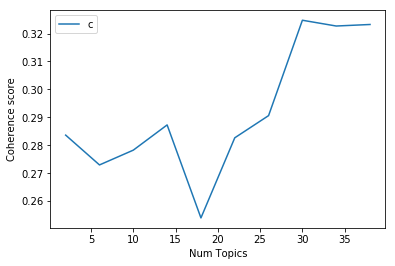

In [124]:
# to select number of topics
import matplotlib.pyplot as plt
x = range(2, 40, 4)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
mallet_path = '../../model/mallet-2.0.8/bin/mallet.bat'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=doc_term_matrix, num_topics=20, id2word=id2word)

In [ ]:
a = []; b = []
for doc_topic_list in lda_model.get_document_topics(doc_term_matrix):
    dtp = max(doc_topic_list, key=lambda x: x[1])
    a.append(dtp)
    doc_topic_list.remove(dtp)
    b.append(doc_topic_list)
pd.concat([df.iloc[:100,:], pd.DataFrame(a)], axis=1)

#### Document is Sentences

In [34]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

data = pd.Series(list(chain(*df.norm_tokens_doc)), name='norm_tokens_doc')

id2word = Dictionary(documents=data)
doc_term_matrix = [id2word.doc2bow(doc) for doc in data]
Lda = gensim.models.ldamulticore.LdaModel
lda_model = Lda(
    corpus=doc_term_matrix,
    id2word=id2word,
    num_topics=10, 
    random_state=100,
    update_every=1, # online iterative learning
    chunksize=100,
    passes=5,
    distributed=False,
    alpha='auto',
    per_word_topics=True
)

In [74]:
topic_words = lda_model.show_topics(formatted=False, num_words=20)

topics_list = []
for (topic, word_list) in topic_words:
    temp = pd.DataFrame(word_list, columns=[f'{topic}_word', f'{topic}_prob'])
    topics_list.append(temp)
pd.concat(topics_list, axis=1)

,0_word,0_prob,1_word,1_prob,2_word,2_prob,3_word,3_prob,4_word,4_prob,5_word,5_prob,6_word,6_prob,7_word,7_prob,8_word,8_prob,9_word,9_prob
0,vegan,0.077060,...,0.069492,'s,0.093777,sandwich,0.085427,realli,0.084974,food,0.079403,eat,0.054112,good,0.117601,one,0.064077,get,0.067296
1,servic,0.070897,u,0.039674,time,0.064041,back,0.063367,got,0.068111,place,0.078227,friend,0.032118,order,0.094104,meat,0.045037,'ve,0.040895
2,love,0.061557,nice,0.031822,go,0.057920,also,0.040185,amaz,0.066287,n't,0.075470,well,0.031912,chicken,0.045327,friendli,0.034419,best,0.040160
3,would,0.055005,ask,0.028222,definit,0.036695,taco,0.038857,sauc,0.056497,great,0.046948,pretti,0.028812,menu,0.041703,think,0.024824,wait,0.039190
4,'',0.048022,super,0.025552,'m,0.034372,fri,0.038612,came,0.050629,like,0.043326,much,0.028032,happi,0.028543,favorit,0.024703,make,0.037885
5,``,0.047359,tabl,0.023726,recommend,0.026549,fish,0.033766,drink,0.041031,tri,0.040802,star,0.024999,burger,0.024290,say,0.024316,even,0.037746
6,price,0.029946,server,0.021025,first,0.026456,shrimp,0.020907,enjoy,0.027594,come,0.033598,lot,0.021448,went,0.021026,take,0.024107,bread,0.030267
7,could,0.029137,spot,0.021002,littl,0.023510,fresh,0.018318,next,0.023289,delici,0.026355,cream,0.020201,ca,0.020716,better,0.023561,alway,0.028544
8,dish,0.026511,minut,0.020985,thing,0.020422,still,0.017949,enough,0.019312,tast,0.022212,ice,0.019699,portion,0.019073,meal,0.021575,hour,0.028147
9,everyth,0.023457,right,0.018590,day,0.017563,dutch,0.015392,bbq,0.018598,restaur,0.021401,way,0.019353,salad,0.017363,work,0.020077,staff,0.025489


In [66]:
top_words_per_topic = []
for t in range(lda_model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in lda_model.show_topic(t, topn = 10)])

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])

,Topic,Word,P
0,0,vegan,0.077060
1,0,servic,0.070897
2,0,love,0.061557
3,0,would,0.055005
4,0,'',0.048022
5,0,``,0.047359
6,0,price,0.029946
7,0,could,0.029137
8,0,dish,0.026511
9,0,everyth,0.023457


In [36]:
fname = '../../model/lda_model_0001_0256_simple_doc2bow'
# save
lda_model.save(fname)

# load
Lda = gensim.models.ldamodel.LdaModel
saved_model = Lda.load(fname)
saved_model.show_topics(num_words=4)

[(0, '0.077*"vegan" + 0.071*"servic" + 0.062*"love" + 0.055*"would"'),
 (1, '0.069*"..." + 0.040*"u" + 0.032*"nice" + 0.028*"ask"'),
 (2, '0.094*"\'s" + 0.064*"time" + 0.058*"go" + 0.037*"definit"'),
 (3, '0.085*"sandwich" + 0.063*"back" + 0.040*"also" + 0.039*"taco"'),
 (4, '0.085*"realli" + 0.068*"got" + 0.066*"amaz" + 0.056*"sauc"'),
 (5, '0.079*"food" + 0.078*"place" + 0.075*"n\'t" + 0.047*"great"'),
 (6, '0.054*"eat" + 0.032*"friend" + 0.032*"well" + 0.029*"pretti"'),
 (7, '0.118*"good" + 0.094*"order" + 0.045*"chicken" + 0.042*"menu"'),
 (8, '0.064*"one" + 0.045*"meat" + 0.034*"friendli" + 0.025*"think"'),
 (9, '0.067*"get" + 0.041*"\'ve" + 0.040*"best" + 0.039*"wait"')]

In [38]:
df.norm_tokens_doc.count()

454043

In [39]:
len(lda_model.get_document_topics(doc_term_matrix))

3357040

In [40]:
# score topic and probabilities to each document (sentence in this case)
a = []; b = []
for doc_topic_list in lda_model.get_document_topics(doc_term_matrix):
    dtp = max(doc_topic_list, key=lambda x: x[1])
    a.append(dtp)
    doc_topic_list.remove(dtp)
    b.append(doc_topic_list)

pd_sent_topic = pd.concat([data, pd.DataFrame(a, columns=['topic', 'prob'])], axis=1)
pd_sent_topic.head()

,norm_tokens_doc,topic,prob
0,"(stumbl, across, great, restaur, overlook, oce...",5,0.311255
1,"(high, expect, place, boy, blow, water)",5,0.202032
2,"(fish, chip, best, 've, ever, 've, lot, includ...",9,0.202616
3,"(highli, recommend)",5,0.166164
4,"(also, turkey, bacon, sandwich, good)",3,0.191926


In [41]:
pd_sent_topic.count()

norm_tokens_doc    3357040
topic              3357040
prob               3357040
dtype: int64

In [42]:
# document/review topic prob distribution
lda_model[doc_term_matrix][9]

[(0, 0.06538894),
 (1, 0.06996099),
 (2, 0.11178656),
 (3, 0.07341155),
 (4, 0.049342375),
 (5, 0.1372504),
 (6, 0.0695846),
 (7, 0.0727972),
 (8, 0.073354565),
 (9, 0.27712286)]

In [43]:
# document/review topic prob distribution
lda_model.get_document_topics(doc_term_matrix[9])

[(0, 0.06538894),
 (1, 0.06996099),
 (2, 0.11178656),
 (3, 0.07341155),
 (4, 0.049342375),
 (5, 0.1372504),
 (6, 0.0695846),
 (7, 0.0727972),
 (8, 0.073354565),
 (9, 0.27712286)]

In [44]:
sum(w for i, w in lda_model[doc_term_matrix][9])

1.000000026077032

In [45]:
data[0]
# df.norm_tokens_doc[0]

('stumbl',
 'across',
 'great',
 'restaur',
 'overlook',
 'ocean',
 'lunch',
 'vacat',
 'maui')

In [47]:
[i for i in df.norm_tokens_doc[0]]

[('stumbl',
  'across',
  'great',
  'restaur',
  'overlook',
  'ocean',
  'lunch',
  'vacat',
  'maui'),
 ('high', 'expect', 'place', 'boy', 'blow', 'water'),
 ('fish', 'chip', 'best', "'ve", 'ever', "'ve", 'lot', 'includ', 'london'),
 ('highli', 'recommend'),
 ('also', 'turkey', 'bacon', 'sandwich', 'good'),
 ('term', 'drink', 'highli', 'recommend', 'pacif', 'paradis', 'drink'),
 ('delici', 'tropic'),
 ('also', 'realli', 'enjoy', 'lahaina', 'lemonad'),
 ('servic', 'realli', 'great'),
 ('wish',
  'rememb',
  'waitress',
  'name',
  'truli',
  'awesom',
  'recommend',
  'best',
  'stuff'),
 ('blond', 'cute', 'sunglass')]

In [48]:
len(pd_sent_topic)

3357040

In [49]:
sum(len(i) for i in df.norm_tokens_doc)

3357040

In [50]:
[len(i) for i in df.norm_tokens_doc[:10]]

[11, 5, 14, 34, 10, 6, 6, 14, 8, 10]

In [51]:
pd_sent_topic.iloc[0:11,:]

,norm_tokens_doc,topic,prob
0,"(stumbl, across, great, restaur, overlook, oce...",5,0.311255
1,"(high, expect, place, boy, blow, water)",5,0.202032
2,"(fish, chip, best, 've, ever, 've, lot, includ...",9,0.202616
3,"(highli, recommend)",5,0.166164
4,"(also, turkey, bacon, sandwich, good)",3,0.191926
5,"(term, drink, highli, recommend, pacif, paradi...",4,0.182715
6,"(delici, tropic)",5,0.196258
7,"(also, realli, enjoy, lahaina, lemonad)",5,0.154845
8,"(servic, realli, great)",5,0.190524
9,"(wish, rememb, waitress, name, truli, awesom, ...",9,0.277123


In [52]:
pd_sent_topic.iloc[11:16,:]

,norm_tokens_doc,topic,prob
11,"(excel, view, ocean, sunset)",5,0.241888
12,"(excel, food)",5,0.196258
13,"(fresh, fish, coconut, yuzu, husband)",3,0.219528
14,"(love,)",5,0.171319
15,"(waitress, super, nice)",5,0.161309


In [53]:
pd_sent_topic.iloc[16:30,:]

,norm_tokens_doc,topic,prob
16,"(place, review, portray)",5,0.190569
17,"(starter, walk, stair, want, sit, balconi, cat...",5,0.265855
18,"(told, ask, sit, tabl, clean, coupl, left)",1,0.256729
19,"(wait, anoth, server, walk, right, u, sat, ano...",1,0.305434
20,"(end, wait, anoth, tabl, place, 40, min, tabl,...",1,0.213793
21,"(food, okay, ..., veget, option, ravioli, dish...",7,0.172228
22,"(tofu, although, look, like, nice, grill, piec...",5,0.255196
23,"('ve, tofu, plenti, time, actual, get, pick, f...",5,0.255196
24,"(true, dish)",5,0.166164
25,"(husband, fish, dish, rice, veggi, side, sweet...",0,0.209332


In [ ]:
# number of sentences and their topic/probs for the **first review**
pd_sent_topic[pd_sent_topic.norm_tokens_doc.apply(lambda x: tuple(x)).isin([i for i in df.norm_tokens_doc[0]])]

In [23]:
pd_doc_temp.head()

NameError: name 'pd_doc_temp' is not defined

In [95]:
','.join(map(str, pd_doc_temp.topic))

'6,4,6,5,6,6,3,6,3,1,8'

In [ ]:
# 
# This is buggy, because the .isin(inner_list) select multiple occurances of inner_list and list populates with
# out of document sentences..
# 03/20/2019
#
topic_mode = []
topic_list = []
sent_topics = []
# score topic and probabilities to each document (**review** in this case)
for doc_sents in df.norm_tokens_doc[:100]:    
    # pd_doc_temp: the topic and the prob for the current document/ review: all sentences and their topic and probs
    pd_doc_temp = pd_sent_topic[pd_sent_topic.norm_tokens_doc.apply(lambda x: tuple(x)).isin([tuple(i) for i in doc_sents])]
    # find the most frequent topic in the review
    sent_topics.append(pd_doc_temp.apply(lambda x: (x.topic, x.prob), axis=1).tolist())
    topic_mode.append(round(pd_doc_temp.topic.mode()[0]))    
    topic_list.append(','.join(map(str, pd_doc_temp.topic)))
    
df['sent_topics'] = pd.Series(sent_topics, name='sent_topics')
df['topic_mode'] = pd.Series(topic_mode, name='topic_mode')
df['topic_list'] = pd.Series(topic_list, name='topic_list')

In [54]:
# 
# This works since we are using indices of current document on the lda's documents
# 03/21/2019
#
topic_mode = []
topic_list = []
sent_topics = []
i, j = 0, 0
# score topic and probabilities to each document (**review** in this case)
for doc_sents in df.norm_tokens_doc:
    j = j + len(doc_sents)
    pd_doc_temp = pd_sent_topic.iloc[i:j,:]
    i = j
    
    sent_topics.append(pd_doc_temp.apply(lambda x: (x.topic, x.prob), axis=1).tolist())
    topic_mode.append(round(pd_doc_temp.topic.mode()[0]))    
    topic_list.append(','.join(map(str, pd_doc_temp.topic)))
    
df['sent_topics'] = pd.Series(sent_topics, name='sent_topics')
df['topic_mode'] = pd.Series(topic_mode, name='topic_mode')
df['topic_list'] = pd.Series(topic_list, name='topic_list')

In [55]:
pd_doc_temp.apply(lambda x: (x.topic, x.prob), axis=1)

3357035     (5, 0.1962578445672989)
3357036    (5, 0.16130907833576202)
3357037    (5, 0.18000635504722595)
3357038    (5, 0.16624051332473755)
3357039    (5, 0.21973922848701477)
dtype: object

In [86]:
pd_doc_temp

,norm_tokens_doc,topic,prob
136022,"(husband, surpris, birthday, cake, kristi)",6,0.147207
136023,"(last, minut, abl, make, happen)",4,0.148071
136024,"(unfortun, n't, like, pineappl, cake)",6,0.142321
136025,"(thought, kind, dri, side, also, may, fridg, d...",5,0.153565
136026,"(cake, gluten, free)",6,0.185749
136027,"('m, sure, realiz, specialti, bakeri)",6,0.173672
136028,"(like, carrot, cake, 's, fave)",3,0.126636
136029,"(anyway, sweet, gestur, husband, 's, part, eve...",6,0.139029
136030,"(thank, kristi, short, notic, cake)",3,0.132093
136031,"('m, sure, could, 've, gotten, someth, like, w...",1,0.175870


In [26]:
df.loc[:, ['alias', 'ratingValue', 'word_tokens_doc', 'topic_mode', 'topic_list', 'sent_topics']].head()

,alias,ratingValue,word_tokens_doc,topic_mode,topic_list,sent_topics
0,kimos-maui-lahaina,5,"[(I, stumbled, across, this, great, restaurant...",5,"5,5,9,5,3,4,5,5,5,9,5","[(5, 0.3112545907497406), (5, 0.20203207433223..."
1,kimos-maui-lahaina,5,"[(Excellent, view, on, the, ocean, at, sunset,...",5,"5,5,3,5,5","[(5, 0.24188750982284546), (5, 0.1962578445672..."
2,kimos-maui-lahaina,3,"[(This, place, was, not, what, the, reviews, p...",5,"5,5,1,1,1,7,5,5,5,0,5,5,2,5","[(5, 0.19056889414787292), (5, 0.2658553421497..."
3,kimos-maui-lahaina,2,"[(We, were, excited, to, repeat, our, Keoki, '...",5,"5,5,2,6,5,0,5,5,8,5,5,5,7,7,5,5,5,5,5,5,5,7,9,...","[(5, 0.18351130187511444), (5, 0.2023473381996..."
4,kimos-maui-lahaina,3,"[(If, you, 're, looking, for, a, tourist, spot...",5,"5,5,2,6,9,5,9,0,5,5","[(5, 0.21350185573101044), (5, 0.1800063550472..."


In [56]:
df.to_csv('../../data/processed/yp_competitors_rws_0001_0256_topics.csv', index=False)

In [62]:
df.loc[:, ['topic_mode', 'alias']].groupby(by='topic_mode').count()

,alias
topic_mode,
0,804
1,2379
2,3186
3,3570
4,64
5,442512
6,446
7,420
8,180


In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[doc_term_matrix]):
    topic_weights.append([w for i, w in row_list])

In [ ]:
# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0)

In [ ]:
# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]
arr.shape

# Dominant topic number in each doc
# topic_num = np.argmax(arr, axis=1)

In [ ]:
# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
pca_lda = pca.fit_transform(arr)
pca_lda.shape

In [ ]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)
tsne_lda.shape

In [ ]:
import matplotlib.pyplot as plt
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)   
    y = range(X.shape[0])
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], 'x',
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
plot_embedding(tsne_lda)

In [ ]:
plt.scatter(pca_lda[:,0], pca_lda[:,1], color=plt.cm.Set1(range(len(pca_lda))))

In [58]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary=lda_model.id2word)
vis

KeyboardInterrupt: 